## Importing Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Logistic Regression/Diabetes Prediction/Diabetes_Data.csv')
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploring the Data

In [ ]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

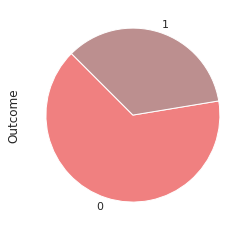

In [ ]:
data1['Outcome'].value_counts().plot.pie(startangle=135,colors=['lightcoral','rosybrown'])
data1['Outcome'].value_counts(normalize=True)

#### Around 65% of users are healthy ( non-Diabetic)

### Distribution Plots of features:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

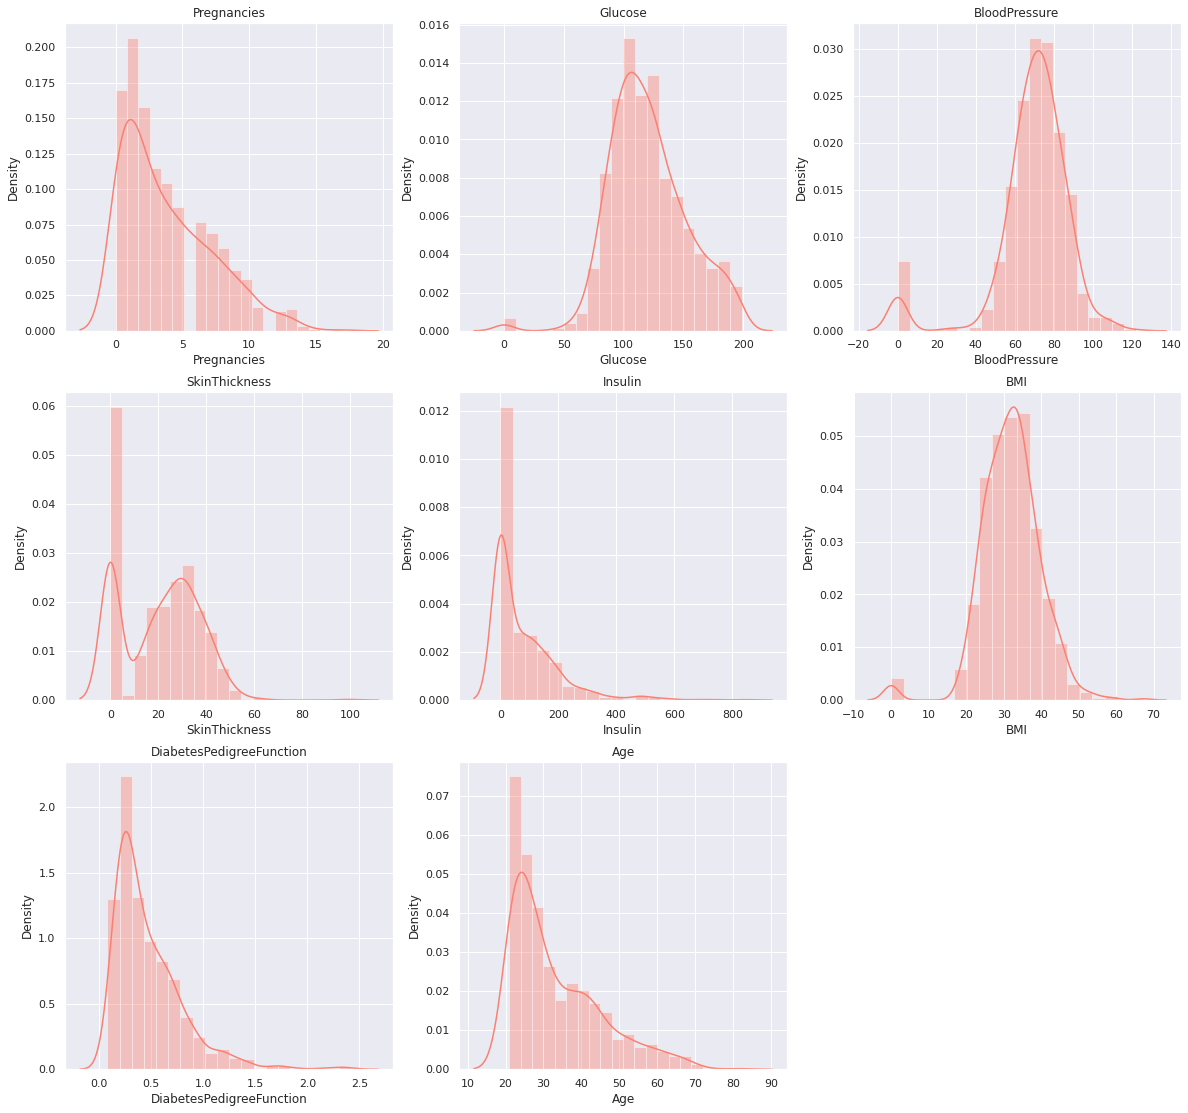

In [ ]:
N_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,60), facecolor='white')
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.distplot(data1[col], bins=20,color='Salmon')
    plt.title(col)
    plotnum+=1
plt.show()

## Preprocessing the Data

#### Checking for missing values

In [ ]:
data1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Many column seems to have min value zero let us observe the Proportion of zeros in each column
print("Proportion of missing values")
missing_percentage = (data1==0).sum()*100/data1.shape[0]
missing_percentage

Proportion of missing values


Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

In [ ]:
#A important point here , zeros in Pregnancy column indicates a feature which could not considered as Missing Value 
# rather zeros present in rest of the columns are to considered as a missing value 
# hence we will go ahead replacing zeros to Nan.
m_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
colnum=1
for col in m_col:
    data1[col]=data1[col].replace(0,np.nan)
    colnum+=1
data1.isnull().sum()/data1.shape[0]

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

### Cleaning the data


#### Load KNNImputer

In [ ]:
# Missing records in insulin, skinfthickness are almost 50%, 30% respectively we can not dorp the the column.
# Now that we have Null values in the columns- we can now impute the missing values using KNN Imputer.
import sklearn
from sklearn.impute import KNNImputer,SimpleImputer

In [ ]:
imputer = KNNImputer(n_neighbors=14)
k_data1=imputer.fit_transform(data1)
data2=pd.DataFrame(k_data1,columns=data1.columns,)
data2.shape

(768, 9)

In [ ]:
data2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Dealing with Outliers

In [ ]:
column=['Age','DiabetesPedigreeFunction','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Insulin']
data3 = data2[
#dealing with more than 99 percentile values    
            (data2['Age'] <= data2['Age'].quantile(.99)) &
            (data2['DiabetesPedigreeFunction'] <= data2['DiabetesPedigreeFunction'].quantile(.99)) &
            (data2['Pregnancies'] <= data2['Pregnancies'].quantile(.99)) &
            (data2['Glucose'] <= data2['Glucose'].quantile(.99)) &
            (data2['BloodPressure'] <= data2['BloodPressure'].quantile(.99)) &
            (data2['SkinThickness'] <= data2['SkinThickness'].quantile(.99)) &
            (data2['Insulin'] <= data2['Insulin'].quantile(.99)) &
            (data2['BMI'] <= data2['BMI'].quantile(.99)) &
    
#dealing with the less than 1 percentile values    
            (data2['Age'] >= data2['Age'].quantile(.01)) &
            (data2['DiabetesPedigreeFunction'] >= data2['DiabetesPedigreeFunction'].quantile(.01)) &
            (data2['Pregnancies'] >= data2['Pregnancies'].quantile(.01)) &
            (data2['Glucose'] >= data2['Glucose'].quantile(.01)) &
            (data2['BloodPressure'] >= data2['BloodPressure'].quantile(.01)) &
            (data2['SkinThickness'] >= data2['SkinThickness'].quantile(.01)) &
            (data2['Insulin'] >= data2['Insulin'].quantile(.01)) &
            (data2['BMI'] >= data2['BMI'].quantile(.01)) 
    
             ]

data3.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,3.861314,121.720855,72.222211,28.896976,149.015850,32.212242,0.455188,32.868613,0.350365
std,3.266842,29.023337,11.256226,8.276240,79.119531,6.207198,0.289550,11.226807,0.477433
min,0.000000,68.000000,44.000000,10.000000,29.000000,19.500000,0.100000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,23.000000,92.000000,27.600000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.071429,140.000000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,34.000000,182.000000,36.000000,0.607000,40.000000,1.000000
max,13.000000,196.000000,106.000000,51.000000,510.000000,50.000000,1.698000,67.000000,1.000000


In [ ]:
data=data3.reset_index()

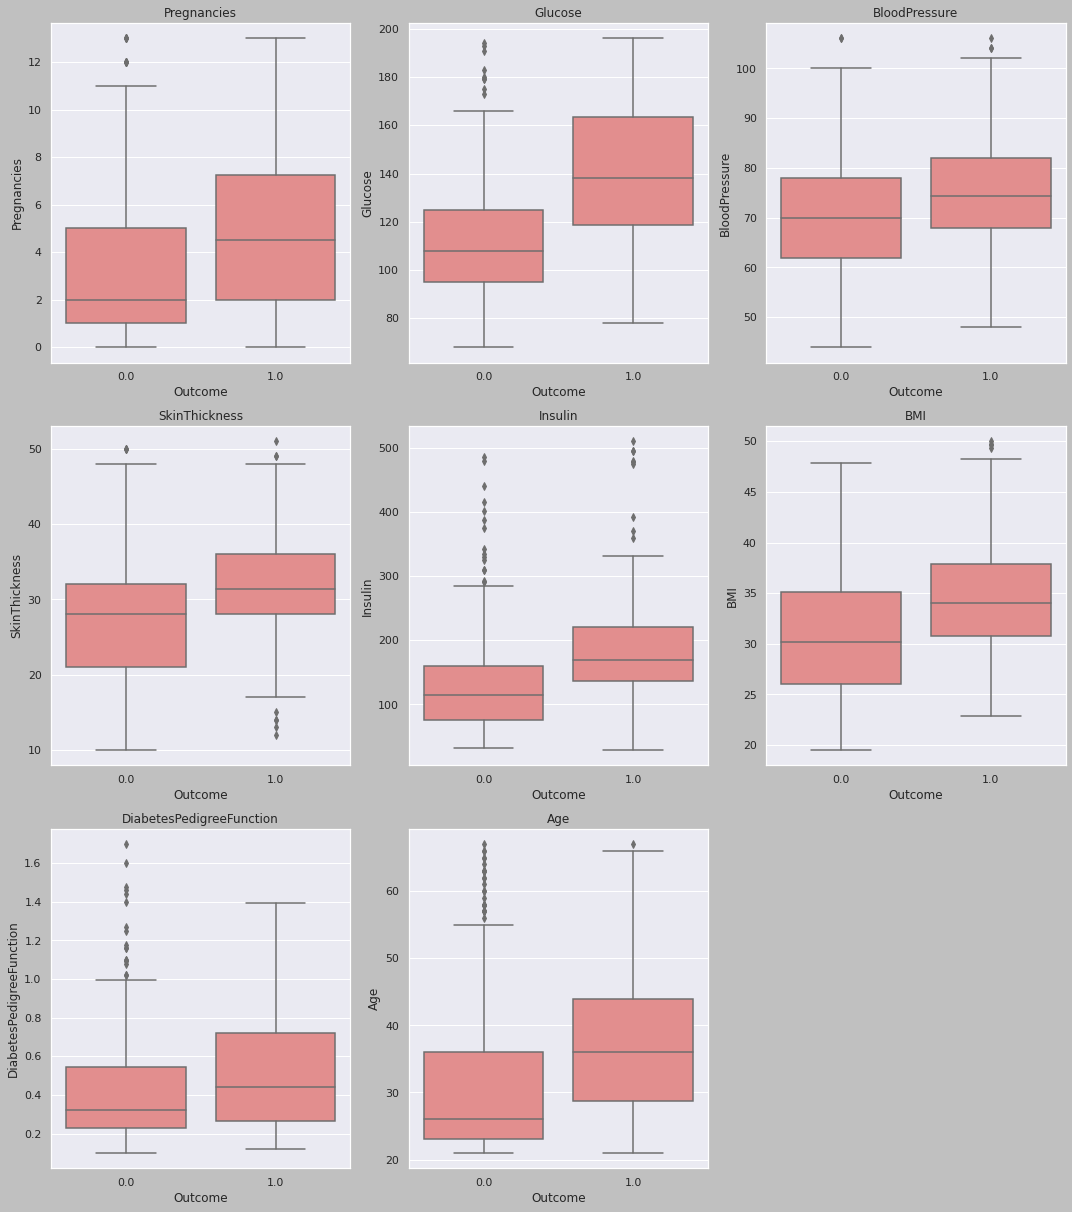

In [ ]:
plt.figure(figsize=(15,50), facecolor='silver',tight_layout=True)
plotnum=1
for col in N_col:
    ax=plt.subplot(9,3,plotnum)
    sns.boxplot(y=data[col],x=data['Outcome'],color='lightcoral')
    plt.title(col)
    plotnum+=1
plt.show()

### Checking for Correlation

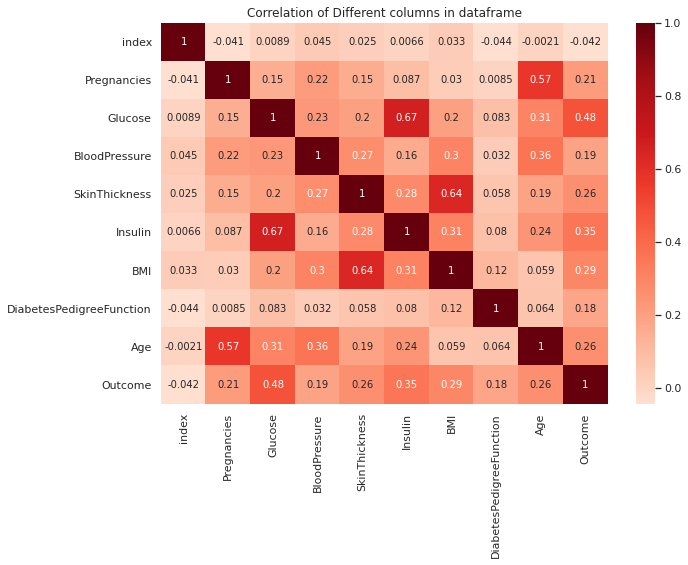

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='Reds',center = 0.4)
plt.title('Correlation of Different columns in dataframe')
plt.show()

#### Insulin and Glucose is most correlated

In [ ]:
# defining the inputs and targets
x1=data.drop('Outcome',axis=1)
y=data['Outcome']

In [ ]:
# Scaling Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)

StandardScaler(copy=True, with_mean=True, with_std=True)

##  Logistic Regression 

### Splitting DataSet into Train and Test:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size = 0.2,random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_curve,auc, plot_confusion_matrix

In [ ]:
y_test.count(),y_train.count()

(137, 548)

In [ ]:
log_model = LogisticRegression(solver='liblinear')
log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred=log_model.predict(x_train)
y_test_pred=log_model.predict(x_test)

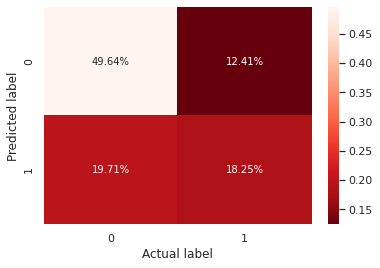

In [ ]:
res= confusion_matrix(y_test, y_test_pred)
sns.heatmap(res/np.sum(res), annot=True, fmt='.2%',cmap='Reds_r')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()

In [ ]:
def Model_Performance(test,pred):
    precision = precision_score(test,pred)
    recall = recall_score(test,pred)
    f1 = f1_score(test,pred)
    print("1. Accuracy Score:", round(accuracy_score(test, pred)*100,2),"%")
    print("2. Precision:", round(precision*100,2),"%")
    print("3. Recall:",round(recall*100,2),"%" )
    print("4. F1 Score:",round(f1*100,2),"%" )
    print("5. clasification report:\n",classification_report(test, pred))
    print('6. Confusion Matrix:\n')
    cm=confusion_matrix(test, pred)
    sns.heatmap(cm/np.sum(cm),annot=True,fmt='0.2%')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

### Training Result

1. Accuracy Score: 77.01 %
2. Precision: 71.53 %
3. Recall: 54.79 %
4. F1 Score: 62.05 %
5. clasification report:
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       360
         1.0       0.72      0.55      0.62       188

    accuracy                           0.77       548
   macro avg       0.75      0.72      0.73       548
weighted avg       0.76      0.77      0.76       548

6. Confusion Matrix:



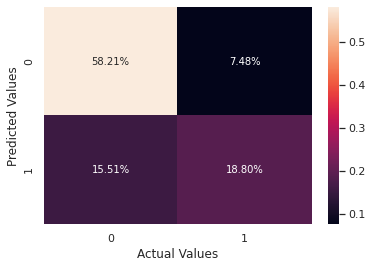

In [ ]:
Model_Performance(y_train,y_train_pred)

### Testing Result

1. Accuracy Score: 67.88 %
2. Precision: 59.52 %
3. Recall: 48.08 %
4. F1 Score: 53.19 %
5. clasification report:
               precision    recall  f1-score   support

         0.0       0.72      0.80      0.76        85
         1.0       0.60      0.48      0.53        52

    accuracy                           0.68       137
   macro avg       0.66      0.64      0.64       137
weighted avg       0.67      0.68      0.67       137

6. Confusion Matrix:



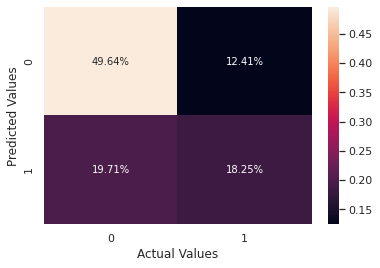

In [ ]:
Model_Performance(y_test,y_test_pred)

In [ ]:
model_f=pd.DataFrame()
model_f['Features'] = list(x_train.columns)
model_f['importance'] = list(log_model.coef_[0])

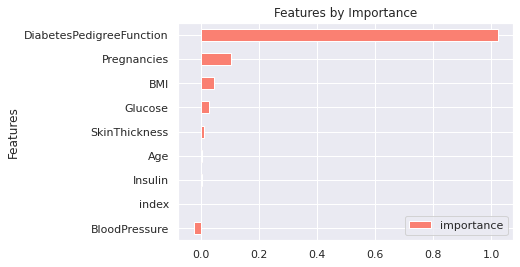

In [ ]:
imp_check=pd.DataFrame(model_f.sort_values(by='importance'))
imp_check.plot.barh(x='Features',y='importance',title='Features by Importance',color='salmon')
plt.show()

##### DiabetesPredigreeFunction and Pregnancies seems to be the 2 most important feature in determining the outcome. BMI and Glucose also have significant contributions.